# Problem 1

![](https://cdn.discordapp.com/attachments/947918193924636695/1231829239091957861/Screenshot_20240422_134830.jpg?ex=66273de0&is=6625ec60&hm=60f48c72e922c026f5313680a8ad35a27eb54e81657f59b2d26b71090fea1072&)

# Problem 2

![](https://cdn.discordapp.com/attachments/947918193924636695/1231829239444275261/Screenshot_20240422_134843.jpg?ex=66386160&is=6625ec60&hm=caad24733942bf279e049b34b73e437ab4a910b8d5d6d4570007e561f97a977f&)

# Problem 3

![](https://cdn.discordapp.com/attachments/947918193924636695/1231829239733551185/Screenshot_20240422_134856.jpg?ex=66273de1&is=6625ec61&hm=bac60391000698c308557c649ad8cfc76e0edeab9398deac6e9ab7f483f7a1d7&)

# Problem 4

![](https://cdn.discordapp.com/attachments/947918193924636695/1236578605828669461/Screenshot_20240505_162143.jpg?ex=66388512&is=66373392&hm=650c0fa7630eab6f1d113fde3b36d1432508f21e52bbc13aa8c5d6bbfa4f673d&)

## (b)

In [1]:
from torch import nn
class STMConvLayer(nn.Module):
  def __init__(self):
    super(STMConvLayer, self).__init__()
    self.convs1 = nn.ModuleList()
    self.convs2 = nn.ModuleList()
    self.convs3 = nn.ModuleList()
    for i in range(32):
      self.convs1.append(nn.Conv2d(256, 4, 1))
      self.convs2.append(nn.Conv2d(4, 4, 3, padding=1))
      self.convs3.append(nn.Conv2d(4, 256, 1))
    self.relu = nn.ReLU()
  
  def forward(self, x):
    outputs = []
    for i in range(32):
      out = self.convs1[i](x)
      out = self.relu(out)
      out = self.convs2[i](out)
      out = self.relu(out)
      out = self.convs3[i](out)
      outputs.append(out)
    out = sum(outputs)
    return out

In [3]:
import torch
class MyConvLayer(nn.Module):
  def __init__(self):
    super(MyConvLayer , self). __init__ ()
    self.conv1 = nn.Conv2d (256, 128, 1,)
    self.conv2 = nn.Conv2d (128, 128, 3, padding =1)
    self.conv3 = nn.Conv2d (128, 256, 1)
  def forward(self , x):
    out = torch.nn.functional.relu(self.conv1(x))
    out = torch.nn.functional.relu(self.conv2(out))
    out = torch.nn.functional.relu(self.conv3(out))
    return out



In [4]:
model = MyConvLayer()
num_params = sum(p.numel() for p in model.parameters())
print(num_params)

213504


In [133]:
model = STMConvLayer()
num_params = sum(p.numel() for p in model.parameters())
print(num_params)

78592


# Problem 5

With some calculations, we find the precise solution of $\theta$ \
$\theta = (X^TX+\lambda)^{-1}X^TY$ \

In [126]:
# ddescent.py
from email import errors
from re import X
import matplotlib.pyplot as plt 
import numpy as np 


"""
Step 1 : Generate Toy data
"""

d = 35
n_train, n_val, n_test = 300, 60, 30
np.random.seed(0)
beta = np.random.randn(d)
beta_true = beta / np.linalg.norm(beta)
# Generate and fix training data
X_train = np.array([np.random.multivariate_normal(np.zeros(d), np.identity(d)) for _ in range(n_train)])
Y_train = X_train @ beta_true + np.random.normal(loc = 0.0, scale = 0.5, size = n_train)
# Generate and fix validation data (for tuning lambda). 
X_val = np.array([np.random.multivariate_normal(np.zeros(d), np.identity(d)) for _ in range(n_val)])
Y_val = X_val @ beta_true 
# Generate and fix test data
X_test = np.array([np.random.multivariate_normal(np.zeros(d), np.identity(d)) for _ in range(n_test)])
Y_test = X_test @ beta_true 


"""
Step 2 : Solve the problem
"""    


lambda_list = [2 ** i for i in range(-6, 6)]
num_params = np.arange(1,1501,10)

errors_opt_lambda = []
errors_fixed_lambda = []
def ReLU(x):
    return np.maximum(x, 0)

def get_theta(X, Y, lamb):
    return np.linalg.inv(X.T @ X + lamb * np.identity(X.shape[1])) @ X.T @ Y

for p in num_params : 
    W = np.random.normal(0, np.sqrt(1/p), (p, d))
    X_train_p = ReLU(X_train @ W.T)
    
    # Fixed lambda
    lamb = 0.01
    theta = get_theta(X_train_p, Y_train, lamb)
    errors_fixed_lambda.append(
        1/2 * np.linalg.norm(theta.T @ ReLU(W @ X_test.T) - Y_test) ** 2
        + lamb/2 * np.linalg.norm(theta) ** 2
    )

    # Optimal lambda
    min_lamb = None
    last_min = None
    for lamb in lambda_list : 
        theta = get_theta(X_train_p, Y_train, lamb)
        err = 1/2*np.linalg.norm(theta.T @ ReLU(W @ X_val.T) - Y_val) ** 2 + lamb/2*np.linalg.norm(theta) ** 2
        if last_min is None or err < last_min : 
            min_lamb = lamb
            last_min = err
    lamb = min_lamb
    theta = get_theta(X_train_p, Y_train, lamb)
    errors_opt_lambda.append(
        1/2*np.linalg.norm(theta.T @ ReLU(W @ X_test.T) - Y_test) ** 2
        + lamb/2*np.linalg.norm(theta) ** 2
        + 0
    )

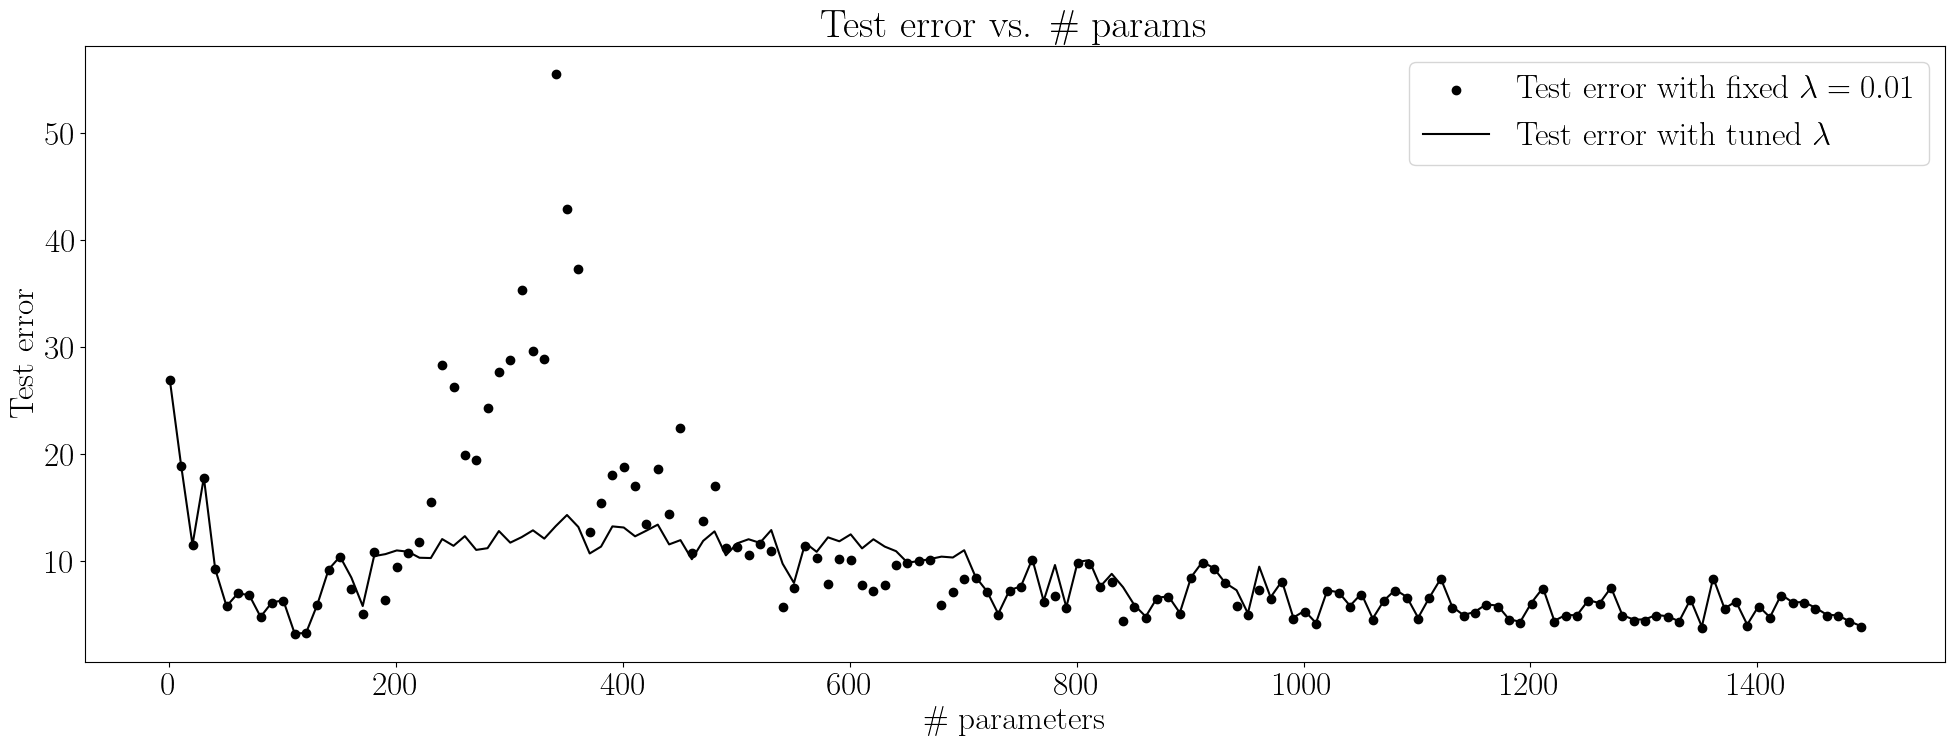

In [127]:

"""
Step 3 : Plot the results
"""    

plt.figure(figsize = (24, 8))
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
plt.rc('font', size = 24)


plt.scatter(num_params, errors_fixed_lambda, color = 'black',
            label = r"Test error with fixed $\lambda = 0.01$",
            ) 
plt.legend()

plt.plot(num_params, errors_opt_lambda, 'k', label = r"Test error with tuned $\lambda$")
plt.legend()
plt.xlabel(r'$\#$ parameters')
plt.ylabel('Test error')
plt.title(r'Test error vs. $\#$ params')

plt.savefig('double_descent.png')
plt.show()